<a href="https://colab.research.google.com/github/dsankush/E-COMMERCE-RETAIL-ANALYSIS/blob/main/e_commerce_retail_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* <b>What is EDA(Exploratory Data Analysis)</b>


1. Exploratory Data Analysis as the name suggests that we are going to explore the data we have given,i.e. 
    we are going to view the data with various observation and question. And also going to process the dataset to 
    more informative manner so that we can get desired analysis outcomes.
    
    
2. We will try to find missing values/ outliers and treat them and also tackling different data types present 
    in different forms and visualizing our data to get more interactive and proper understanding the data with
    with lots of insights from the dataset.

* <b>Importing required libraries</b>

In [ ]:
# To load data from file
import pandas as pd 

# To perform mathemetiacal operations
import numpy as np

# To visualize data and get insight from the data
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Pre-defining the font type and size to provide same throughout the code
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Pre-defining the color schema
sns.set_palette('gist_ncar')

In [3]:
#Mounting drive and read the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading csv File path
#file_path = '/content/drive/MyDrive/E-COMMERCE RETAIL ANALYSIS/retail_data.csv'

# Reading dataset from "Hotel Booking.csv" using pandas read_csv
data=pd.read_csv(path, encoding='unicode_escape')

In [ ]:
# Printing first five elements from the dataset using pandas head
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Reading last five elements from the dataset using pandas tail
data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
# Printing the columns present in dataset

print('Columns in dataset :\n\n',data.columns)

Columns in dataset :

 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [ ]:
# Printing the shape of the dataset

print('Shape of the dataset :',data.shape)

Shape of the dataset : (541909, 8)


In [ ]:
# Printing the nummber of columns and rows present in the dataset

print("The number of Columns are :",data.shape[1])
print("The number of Rows are :",data.shape[0])

The number of Columns are : 8
The number of Rows are : 541909


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Inference:
1. Here we can see that there are 541909 entries in the columns 

* <b>Checking the data types of each column</b>

In [ ]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
# printing the number of numerical features and number of categorical features 

num_col = data.select_dtypes(include = 'number')
print("The number of Numerical features are:",len(num_col.columns))

cat_col = data.select_dtypes(include = 'object')
print("The number of Categorical features are:",len(cat_col.columns))

The number of Numerical features are: 3
The number of Categorical features are: 5


#### Summary Statistic of the numeric columns

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


## Inference :
* Here we can see that the smallest UnitPrice is in negetive value which is -11062.06 and also in quantity which is -80995.00

### Let us seperate our data by removing -ve values

In [ ]:
# Taking only +ve count of quantities
data = data[data["Quantity"] > 0]

# Taking only +ve unit price
data = data[data['UnitPrice'] > 0]

#### Summary Statistic of object form data of columns

In [ ]:
data.describe(include = 'object').T

,count,unique,top,freq
InvoiceNo,530104,19960,573585,1114
StockCode,530104,3922,85123A,2265
Description,530104,4026,WHITE HANGING HEART T-LIGHT HOLDER,2323
InvoiceDate,530104,18499,10/31/2011 14:41,1114
Country,530104,38,United Kingdom,485123


In [ ]:
# In our dataset there are lots of unique values in lots of columns 
# Getting the number of unique values present in these columns

# Using Dictionary Comprehension to get the dictionary of the columns containing more than 1 unique value

unique_count_dict = {column: len(data[column].unique()) for column in data.columns}

In [ ]:
# Creating seperate list of columns and count from the keys and values of the unique_count_dict

column_list = list(unique_count_dict.keys())
unique_value_count = list(unique_count_dict.values())

In [ ]:
# Creating the Dataframe to display the columns and there count of unique values

unique_count_df = pd.DataFrame({'Column_name' : column_list, 'Number_of_Unique_Values' : unique_value_count})

# Sorting this above unique_count_df in ascending order to get to count of unique values present in each column
# Also used reset_index to reset the index and drop the previous index as it was shuffled while sorting values

unique_count_df.sort_values(by = ['Number_of_Unique_Values']).reset_index(drop = True) 

,Column_name,Number_of_Unique_Values
0,Country,38
1,Quantity,375
2,UnitPrice,1291
3,StockCode,3922
4,Description,4026
5,CustomerID,4339
6,InvoiceDate,18499
7,InvoiceNo,19960


### <b>Data Cleaning and Removal of duplicate enteries from the Data</b>

As data cleaning is an important task before we perform any kind of analysis on dataset, we will remove or replace the not necessary data from our dataset so that we can get desired outputs by performing EDA on it.

We have perfrom following cleaning strategy to overcome the data ambiguity:


1. Getting missing data
2. Handling missing data
3. Checking for duplicate data
4. Removing duplicate data

1. <b>Getting missing data</b> 
#### Getting the count of all nan/null values present in the dataset

In [ ]:
# Using isnull() from Pandas to get the Null/NaN values in the each column in dataset and 
# sum() is use to get the sum of missing values present in each column in dataset

print(data.isnull().sum())

# Using list comprehension to provide the list of columns containing missing values

missing_value_columns = [features for features in data.columns if data[features].isnull().sum() > 0]

print("\n--------------------------------------------------------------------------------------------\n")

print('List of columns containing missing values:\n',missing_value_columns)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

--------------------------------------------------------------------------------------------

List of columns containing missing values:
 ['Description', 'CustomerID']


# Inference:

1. Out of Total 541909 rows ,'Description' column contains 1454 number of missing values and 'CustomerID' column contains very large amout of Null/NaN values in it i.e. 135080.


2. As 'CustomerID' column is not needed for our analysis we will drop this columns and from''Description column there is less number of columns which are missing so we will also drop that rows also.

2. <b>Handling missing data</b>

In [ ]:
# dropna will drop the rows from the data containing null/nan/nan values in it providing axis = 0 which denotes rows

data.dropna(axis = 0,inplace = True)

In [ ]:
# Again checking the null values in our dataset
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Inference : 
1. Now we can see that we have successfully removed the Null/NaN values from our dataset

In [ ]:
# Again checking the shape of the dataset
data.shape

(397884, 8)

3. <b>Checking for duplicate data</b>

In [ ]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
# Using duplicated() method to get the duplicate enteries present in our dataset

duplicate_data = data[data.duplicated()]
print('Duplicate data present in our data:',duplicate_data.shape)

print(f'\n\n Number of rows containing duplicate enteries: {duplicate_data.shape[0]}')

Duplicate data present in our data: (5225, 8)


 Number of rows containing duplicate enteries: 5225


# Inference : 

1. There are 5268 duplicate entries out of total 406829 **(after the removal of missing values)** in our dataset

4. <b>Removing duplicate data<b>

In [ ]:
# using drop_duplicates method to drop/delete duplicate enteries from our dataset

data = data.drop_duplicates()

* <b>Now again showing the shape of the dataset after removal of data duplicacy<b>

In [ ]:
data.shape

(392692, 8)

# Inference:

1. After removal of duplicate enteries from our dataset we have 392692 enteries/rows remained in our dataset

* <b>Checking for the outliers present in out dataset</b>

* <b>Visualizing the outliers present in our dataset for some selected variables</b>


* <b> Outliers:</b>A value that "lies outside" (is much smaller or larger than) most of the other values in a set of data.

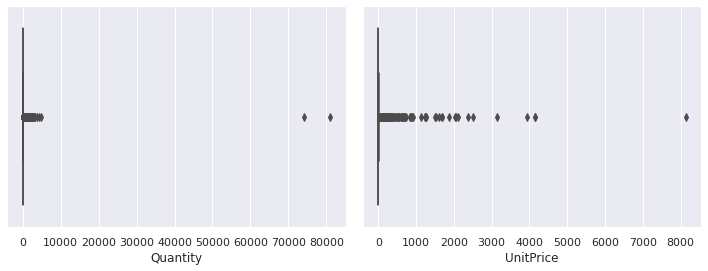

In [ ]:
# ploting the box plots into subplots of each outliered column

columns = ['Quantity','UnitPrice']

n = 1

plt.figure(figsize=(20,15))

for column in columns:
    plt.subplot(4,4,n)
    n = n+1
    sns.boxplot(data[column])
    plt.tight_layout()

# Inference:

1. Lots of outliers are present in our dataset, like column: 

'Quantity' and 'UnitPrice' Column

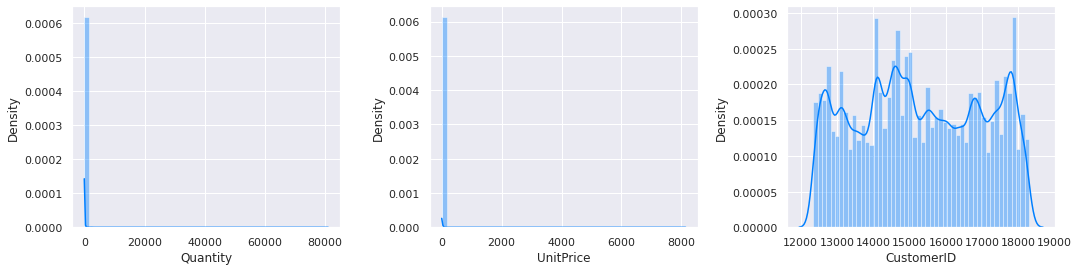

In [ ]:
# ploting distribution for each numerical variable present in our data set
# using distplot from seaborn

columns = data.select_dtypes(include=np.number).columns.tolist()

n = 1

plt.figure(figsize=(20,15))

for column in columns:   
    
    plt.subplot(4,4,n)
    
    n = n+1
    sns.distplot(data[column])
    
    plt.tight_layout()

## Inference :

* **Here we see that there is very much impact of outliers in quantity and UnitPrice column.**

* **We will try to use log transformation so that we can see how much it can be resolved.**

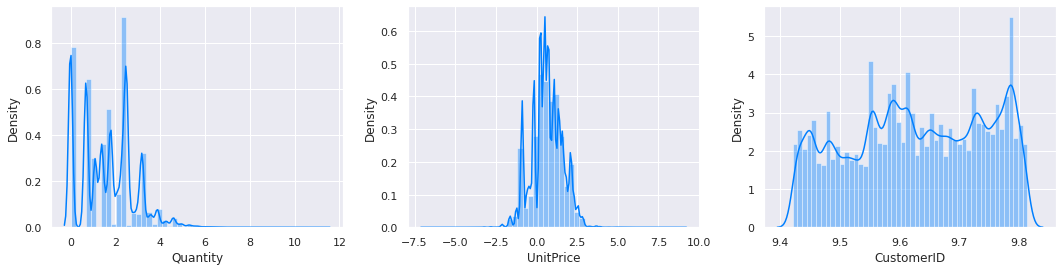

In [ ]:
# Log Transformed Distribution of the Numeric columns

columns = data.select_dtypes(include=np.number).columns.tolist()

n = 1

plt.figure(figsize=(20,15))

for column in columns:   
    
    plt.subplot(4,4,n)
    
    n = n+1
    sns.distplot(np.log(data[column]))
    
    plt.tight_layout()

## Inference :
* **As we can see that there is very good impact of log transformation in our columns after log transformation.**
* **We can also make it more better when we remove outliers from these columns.**

## Adding some columns from our data set by using invoice data clumn to extract months and days from the InvoiceDate

* for this 1st we will convert our InvoiceDate column to datetime column as it is in string(object) format this will help us to implement datetime attributes to it.

In [ ]:
# Converting pickup_datetime and 'InvoiceDate' to datetime using pandas to_datetime method

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

* Here we can see that we successfully converted our InvoiceDate column from string(object) to datetime format.

In [ ]:
# using pandas dt.month attribute to extract the month from our datetime columns.

data['InvoiceMonth'] = data['InvoiceDate'].dt.month_name().str[:3]

In [ ]:
# using pandas day attribute to extract the month day number from our datetime columns.

data['InvoiceDay'] = data['InvoiceDate'].dt.day_name()

In [ ]:
data.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
InvoiceMonth            object
InvoiceDay              object
dtype: object

## Inference
* Here also we can see that we have created two columns from InvoiceDate which are InvoiceMonth and InvoiceDay

# Data Visualization
Visualization is the act of creating images that are used to represent information. This can include graphs, charts, maps, diagrams, etc. Visualizations are often used to communicate complex ideas, processes, and concepts. Data visualizations are different from other types of visuals in that they use statistical methods to present numerical data. 

### <b>Univariate Analysis:</b>
* The most basic type of data analysis is univariate analysis.Because "uni" implies "one," your data only has one variable.It does not deal with causes or relationships (unlike regression) and its primary goal is to describe; it gathers data, summarises it, and looks for patterns. 

* <b>Lets have some observation of retail from each county</b>

In [ ]:
# Retail from each country except United Kingdom
country = data['Country'].value_counts()
print(f"Total number of count of retailing for each country:\n\n{country}")

Total number of count of retailing for each country:

United Kingdom          488846
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Communi

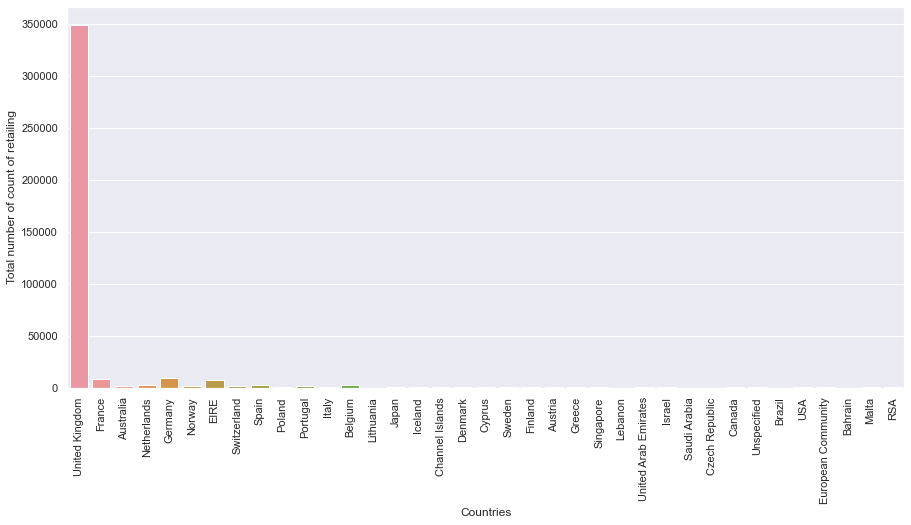

In [ ]:
# Using countplot from seaborn to get the retail from each country

sns.set(font_scale = 1)
sns.set_palette('gist_ncar')
plt.figure(figsize = (15,7))

sns.countplot(data['Country'])

plt.xlabel('Countries',)
plt.ylabel('Total number of count of retailing')
plt.xticks(rotation=90)
plt.show()

# Inference:
1. Here we can see that the Country United Kingdom has the maximum number of count of retailing which is around 480000 after that is France having 9000+ retailing count and orther countries having very low count.

### Let us look out the above chart ignorning United Kingdom

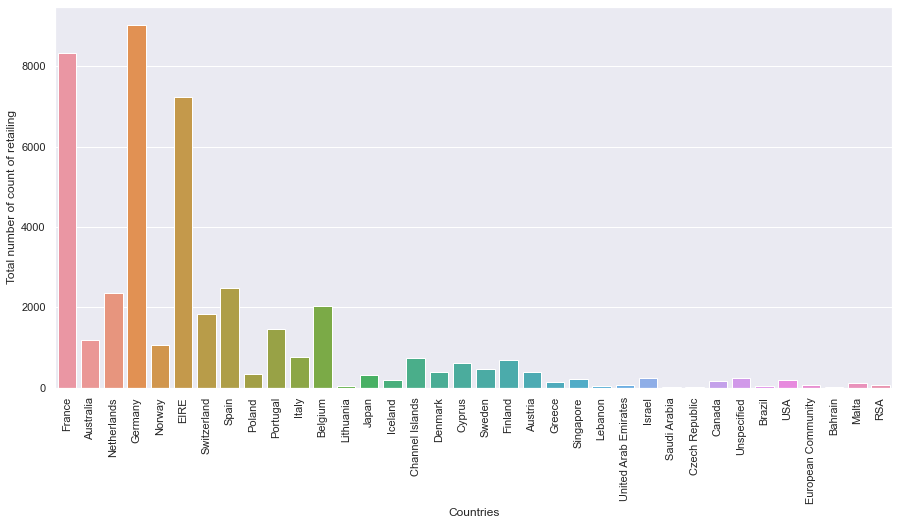

In [ ]:
# Using countplot from seaborn to get the retail from each country except United Kingdom

sns.set(font_scale = 1)
sns.set_palette('gist_ncar')
plt.figure(figsize = (15,7))

rmv_uk = data[data['Country'] != 'United Kingdom']

sns.countplot(rmv_uk['Country'])

plt.xlabel('Countries',)
plt.ylabel('Total number of count of retailing')
plt.xticks(rotation=90)
plt.show()

## Inference:
* Here we can see that there is other countries also having high retail bar France, Germany, EIRE, Spain.
* If we look out the least retail rate then we can consider Saudi Arabia, Lithuania etc.

* <b>Let us look out the monthly retail trend</b>

In [ ]:
# Total Value count of Monthly retail

print(f"Monthly retail count :\n\n{data['InvoiceMonth'].value_counts()}")

Monthly retail count :

Nov    63168
Oct    48793
Dec    42696
Sep    39669
May    28073
Jun    26926
Mar    26870
Aug    26790
Jul    26580
Apr    22433
Jan    20988
Feb    19706
Name: InvoiceMonth, dtype: int64


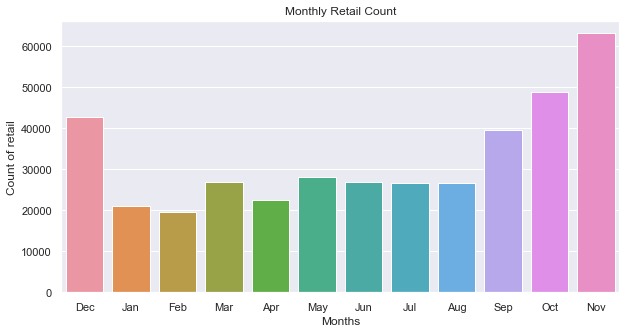

In [ ]:
# Using countplot from seaborn to get the count of Monthly retail

plt.figure(figsize = (10,5))

sns.countplot(data['InvoiceMonth'])

plt.title('Monthly Retail Count')
plt.xlabel('Months')
plt.ylabel('Count of retail')

plt.show()

# Inference : 

* As we can see that in the month of November and December there were most number of retailing and between January - August there is a constant retal count and starts increasing from november.

* <b>Now Checking count of retail done weekly</b>

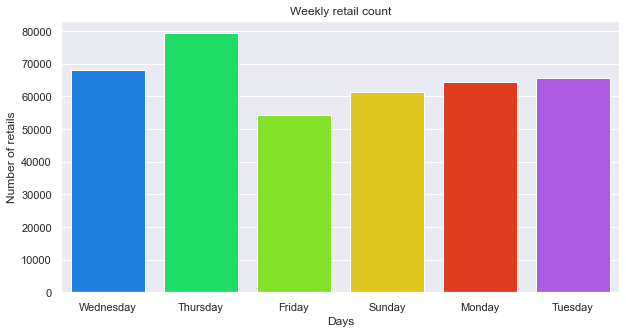

In [ ]:
# Ploting bar graph to visualize the Weekly retail

plt.figure(figsize = (10,5))
sns.countplot(data['InvoiceDay'])
plt.title('Weekly retail count')
plt.xlabel('Days')
plt.ylabel('Number of retails')

plt.show()

# Inference:
1. We can observe that there is no retail happened on Saturday and lowest retail is occured in the weekend(Friday and Sunday) and maximumu retail occured on **Thrusday.**

#### Let us also check the yearly data for retail for that we will extract years from InvoiceDate column

In [ ]:
data['InvoiceYear'] = data['InvoiceDate'].dt.strftime('%Y')

In [ ]:
data.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
InvoiceMonth            object
InvoiceDay              object
InvoiceYear             object
dtype: object

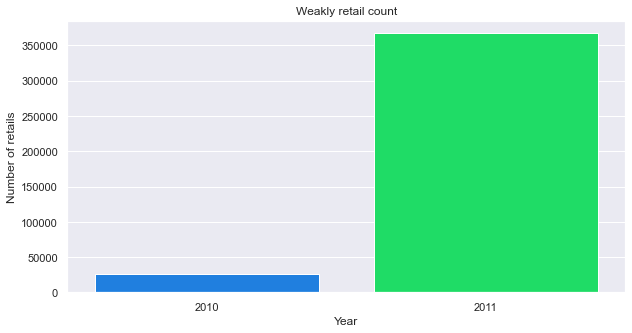

In [ ]:
# Ploting bar graph to visualize the yearly retail

plt.figure(figsize = (10,5))

sns.countplot(data['InvoiceYear'])

plt.title('Weakly retail count')
plt.xlabel('Year')
plt.ylabel('Number of retails')

plt.show()

## Inference :
* Here from this bar chart we can see that in 2010 there is very less number of retail as it is due to only 1 month data is available from 2010.

### Let us look out the hourly trend of the retailing for this we will extract hour data from InvoiceDate column

In [ ]:
data['InvoiceHour'] = data['InvoiceDate'].dt.hour

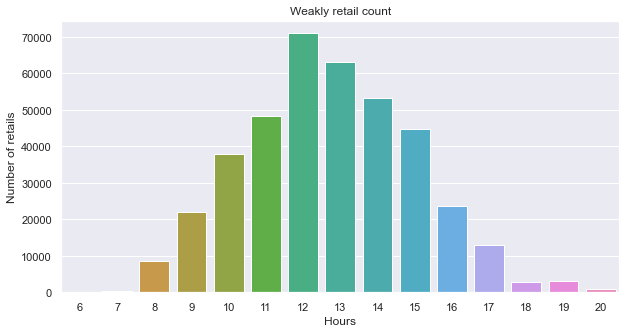

In [ ]:
# Ploting bar graph to visualize the hourly retail

plt.figure(figsize = (10,5))
sns.countplot(data['InvoiceHour'])
plt.title('Weakly retail count')
plt.xlabel('Hours')
plt.ylabel('Number of retails')

plt.show()

## Inference:
* Here we can see that between 10AM - 3PM there are more retails occured and at night till morning it is declined.

### <b>Bivariate Analysis:</b>
* The analysis of bivariate data is known as bivariate analysis.It is one of the most basic types of statistical analysis, and it is used to determine whether two sets of values have a relationship.The variables X and Y are generally involved.


* <b>Let us create an TotalPrice column that will help us to get the total retail price for each retail we can compute this by multiplying the unit price with quantity</b>

In [ ]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [ ]:
data.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
InvoiceMonth            object
InvoiceDay              object
InvoiceYear             object
TotalPrice             float64
dtype: object

In [ ]:
data.groupby(by=['InvoiceMonth'])['TotalPrice'].sum().index.tolist()[1:]



['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

In [ ]:
# Let us look in Monthy total money spent on retail
# By using Groupby from pandas to group month and total money spent in each month

monthly_spent = data.groupby(['InvoiceMonth'])['TotalPrice'].sum()[1:]

monthly_spent

InvoiceMonth
Aug     644051.040
Dec    1087613.170
Feb     446084.920
Jan     568101.310
Jul     598962.901
Jun     660046.050
Mar     594081.760
May     677355.150
Nov    1156205.610
Oct    1035642.450
Sep     950690.202
Name: TotalPrice, dtype: float64

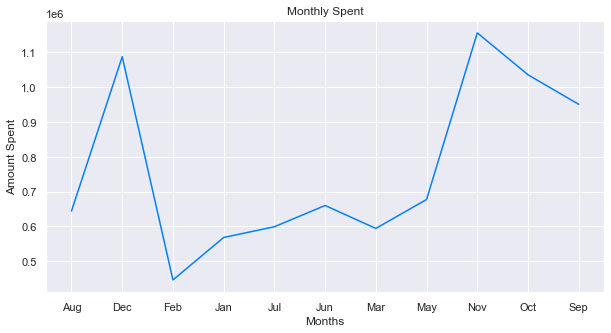

In [ ]:
plt.figure(figsize = (10,5))

plt.plot(monthly_spent)

plt.title('Monthly Spent')
plt.xlabel('Months')
plt.ylabel('Amount Spent')

plt.show()

In [ ]:
# Let us look out the money spent by each customer 

Customer_buy = data.groupby(by=["CustomerID"],as_index=False)["TotalPrice"].sum()

#### sorting the customers on the basis of total price in descending order\

In [ ]:
Customer_buy = Customer_buy.sort_values('TotalPrice', ascending = False)
Customer_buy

,CustomerID,TotalPrice
1689,14646.0,280206.02
4201,18102.0,259657.30
3728,17450.0,194390.79
3008,16446.0,168472.50
1879,14911.0,143711.17
...,...,...
3323,16878.0,13.30
4098,17956.0,12.75
3014,16454.0,6.90
1793,14792.0,6.20


### lets have a look at top 10 customers buying rate

In [ ]:
# Seperating top 10 customers
top_10 = Customer_buy.head(10).reset_index(drop = True)
top_10

,CustomerID,TotalPrice
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17
5,12415.0,124914.53
6,14156.0,117210.08
7,17511.0,91062.38
8,16029.0,80850.84
9,12346.0,77183.60


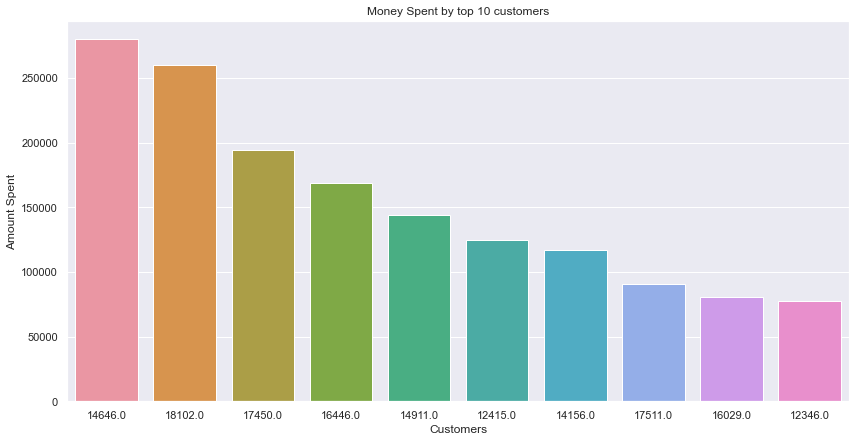

In [ ]:
# Ploting the graph to visualize the top 10 customers with most money spent

plt.figure(figsize = (14, 7))
sns.barplot(x = 'CustomerID', y = 'TotalPrice', 
            data = top_10, order = top_10.sort_values('TotalPrice', ascending = False).CustomerID)

plt.title('Money Spent by top 10 customers')
plt.xlabel('Customers')
plt.ylabel('Amount Spent')

plt.show()

In [ ]:
# Seperating last 10 customers
last_10 = Customer_buy.tail(10).reset_index(drop = True)
last_10

,CustomerID,TotalPrice
0,16953.0,20.80
1,16093.0,17.00
2,17763.0,15.00
3,15823.0,15.00
4,13307.0,15.00
5,16878.0,13.30
6,17956.0,12.75
7,16454.0,6.90
8,14792.0,6.20
9,16738.0,3.75


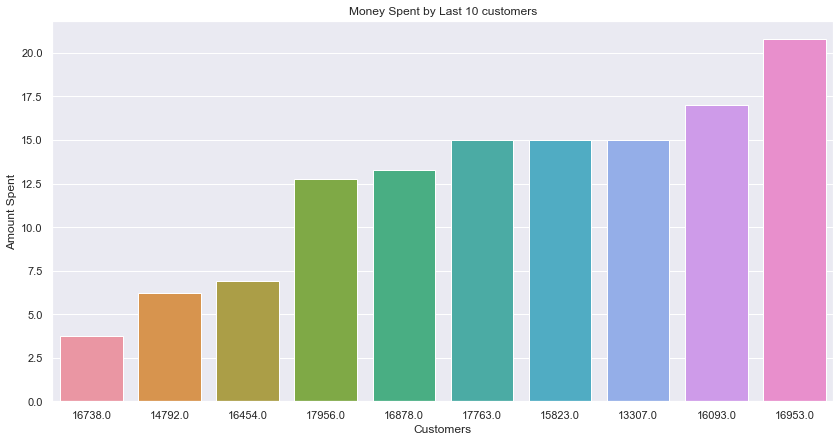

In [ ]:
# Ploting the graph to visualize the last 10 customers with most money spent

plt.figure(figsize = (14, 7))
sns.barplot(x = 'CustomerID', y = 'TotalPrice', 
            data = last_10, order = last_10.sort_values('TotalPrice', ascending = True).CustomerID)

plt.title('Money Spent by Last 10 customers')
plt.xlabel('Customers')
plt.ylabel('Amount Spent')

plt.show()

In [ ]:
# Let us look out the money spent by each Country 

country_buy = data.groupby(by=["Country"],as_index=False)["TotalPrice"].sum()

In [ ]:
country_buy = country_buy.sort_values('TotalPrice', ascending = False)
country_buy

,Country,TotalPrice
35,United Kingdom,7285024.644
23,Netherlands,285446.340
10,EIRE,265262.460
14,Germany,228678.400
13,France,208934.310
0,Australia,138453.810
30,Spain,61558.560
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38367.830


### Let us look ahead to the top 10 countries spent most of the money

In [ ]:
# Seperating top 10 Countries
top_10_country = country_buy.head(10).reset_index(drop = True)
top_10_country

,Country,TotalPrice
0,United Kingdom,7285024.644
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


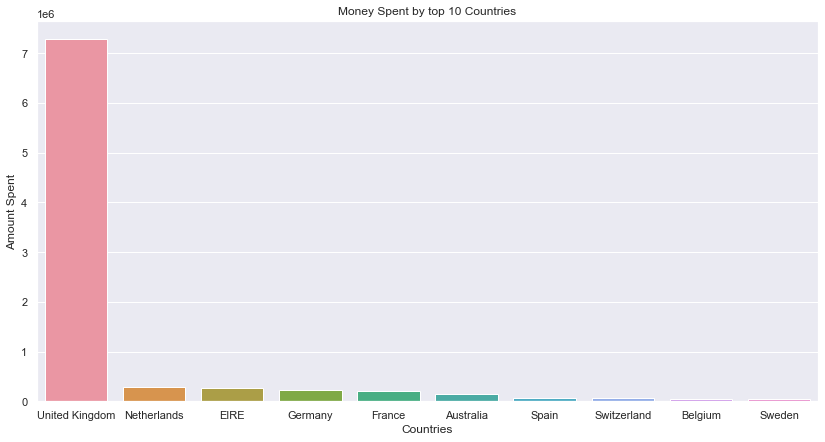

In [ ]:
# Ploting the graph to visualize the top 10 Countries with most money spent

plt.figure(figsize = (14, 7))
sns.barplot(x = 'Country', y = 'TotalPrice', 
            data = top_10_country, order = top_10_country.sort_values('TotalPrice', ascending = False).Country)

plt.title('Money Spent by top 10 Countries')
plt.xlabel('Countries')
plt.ylabel('Amount Spent')

plt.show()

#### Let us ignore the United kingdom and then check the results.

In [ ]:
# Seperating top 10 Countries
without_uk = country_buy[country_buy['Country'] != 'United Kingdom'] 
top_10_country = without_uk.head(10).reset_index(drop = True)
top_10_country

,Country,TotalPrice
0,Netherlands,285446.34
1,EIRE,265262.46
2,Germany,228678.40
3,France,208934.31
4,Australia,138453.81
5,Spain,61558.56
6,Switzerland,56443.95
7,Belgium,41196.34
8,Sweden,38367.83
9,Japan,37416.37


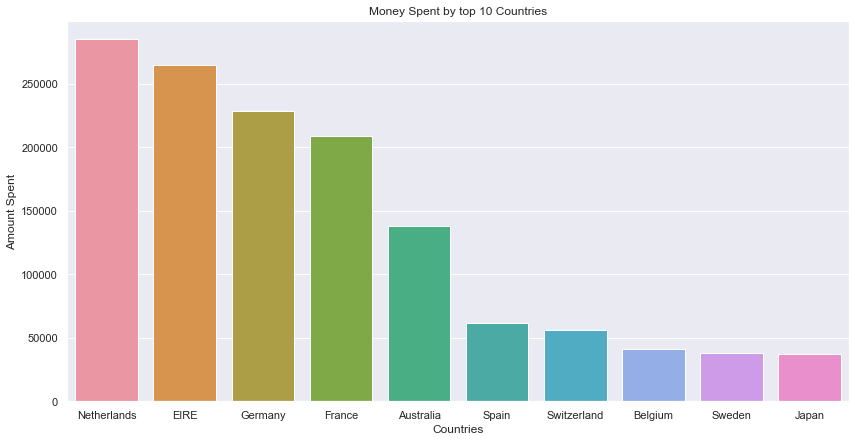

In [ ]:
# Ploting the graph to visualize the top 10 Countries with most money spent

plt.figure(figsize = (14, 7))
sns.barplot(x = 'Country', y = 'TotalPrice', 
            data = top_10_country, order = top_10_country.sort_values('TotalPrice', ascending = False).Country)

plt.title('Money Spent by top 10 Countries')
plt.xlabel('Countries')
plt.ylabel('Amount Spent')

plt.show()

### Let us check now number of orders from each country

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth', 'InvoiceDay',
       'InvoiceYear', 'TotalPrice', 'InvoiceHour'],
      dtype='object')

In [ ]:
# Let us look out the number of order from each Country 

order_count = data.groupby(by=["Country"],as_index=False)["InvoiceNo"].count()

In [ ]:
order_count = order_count.sort_values('InvoiceNo', ascending = False)
order_count

,Country,InvoiceNo
35,United Kingdom,349203
14,Germany,9025
13,France,8326
10,EIRE,7226
30,Spain,2479
23,Netherlands,2359
3,Belgium,2031
32,Switzerland,1841
26,Portugal,1453
0,Australia,1181


In [ ]:
# Seperating top 10 Countries
top_10_country_orders = order_count.head(10).reset_index(drop = True)
top_10_country_orders

,Country,InvoiceNo
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1453
9,Australia,1181


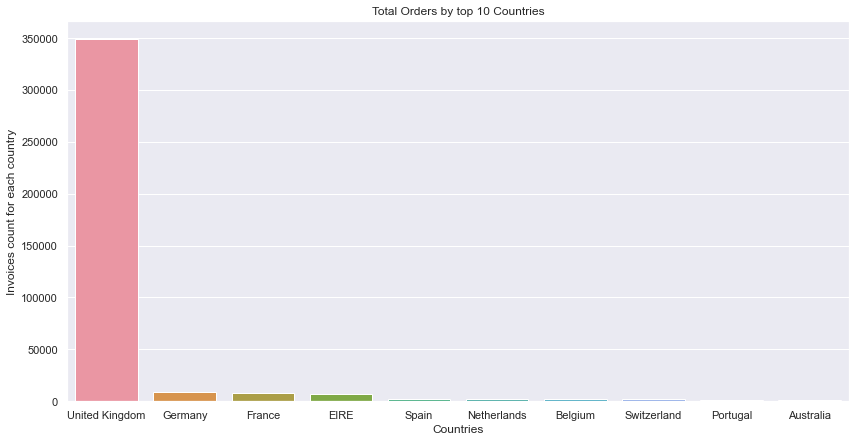

In [ ]:
# Ploting the graph to visualize the top 10 Countries with most number of orders

plt.figure(figsize = (14, 7))
sns.barplot(x = 'Country', y = 'InvoiceNo', 
            data = top_10_country_orders, order = top_10_country_orders.sort_values('InvoiceNo', ascending = False).Country)

plt.title('Total Orders by top 10 Countries')
plt.xlabel('Countries')
plt.ylabel('Invoices count for each country')

plt.show()

In [ ]:
# Seperating top 10 Countries without United Kingdom
without_uk_orders = order_count[order_count['Country'] != 'United Kingdom'] 
top_10_country_orders = without_uk_orders.head(10).reset_index(drop = True)
top_10_country_orders

,Country,InvoiceNo
0,Germany,9025
1,France,8326
2,EIRE,7226
3,Spain,2479
4,Netherlands,2359
5,Belgium,2031
6,Switzerland,1841
7,Portugal,1453
8,Australia,1181
9,Norway,1071


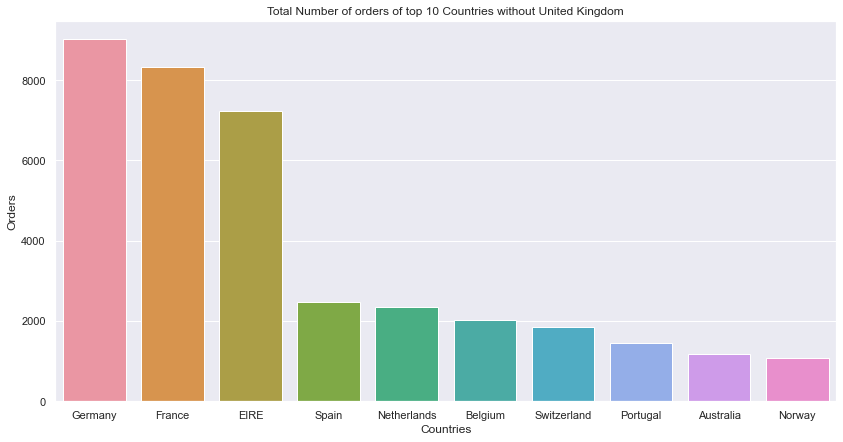

In [ ]:
# Ploting the graph to visualize the top 10 Countries with most number of orders without United Kingdom

plt.figure(figsize = (14, 7))
sns.barplot(x = 'Country', y = 'InvoiceNo', 
            data = top_10_country_orders, order = top_10_country_orders.sort_values('InvoiceNo', ascending = False).Country)

plt.title('Total Number of orders of top 10 Countries without United Kingdom')
plt.xlabel('Countries')
plt.ylabel('Orders')

plt.show()

### Let us look out the number of order from each Customer 

In [ ]:
customer_order_count = data.groupby(by=["CustomerID"],as_index=False)["InvoiceNo"].count()


In [ ]:
customer_order_count = customer_order_count.sort_values('InvoiceNo', ascending = False)
customer_order_count

,CustomerID,InvoiceNo
4010,17841.0,7676
1879,14911.0,5670
1289,14096.0,5111
326,12748.0,4412
1661,14606.0,2677
...,...,...
1001,13703.0,1
1037,13747.0,1
3648,17347.0,1
3636,17331.0,1


In [ ]:
# Seperating top 10 Customers
top_10_customer_orders = customer_order_count.head(10).reset_index(drop = True)
top_10_customer_orders

,CustomerID,InvoiceNo
0,17841.0,7676
1,14911.0,5670
2,14096.0,5111
3,12748.0,4412
4,14606.0,2677
5,15311.0,2366
6,14646.0,2076
7,13089.0,1814
8,13263.0,1667
9,14298.0,1637


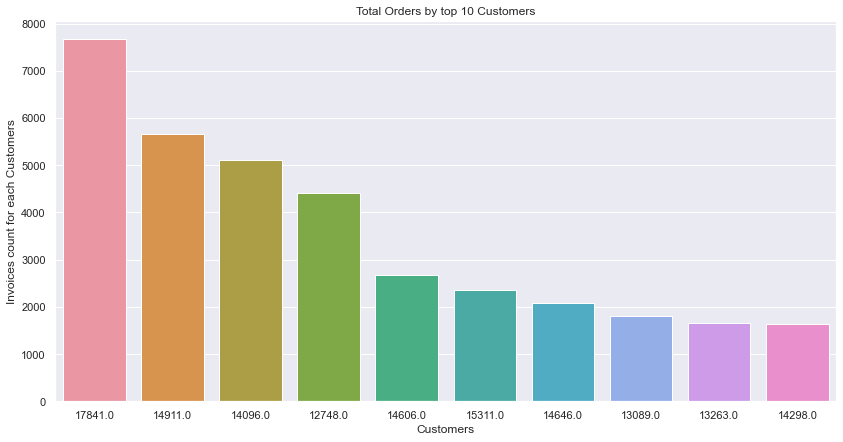

In [ ]:
# Ploting the graph to visualize the top 10 customers with most number of orders

plt.figure(figsize = (14, 7))
sns.barplot(x = 'CustomerID', y = 'InvoiceNo', 
            data = top_10_customer_orders, order = top_10_customer_orders.sort_values('InvoiceNo', ascending = False).CustomerID)

plt.title('Total Orders by top 10 Customers')
plt.xlabel('Customers')
plt.ylabel('Invoices count for each Customers')

plt.show()

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceDay,InvoiceYear,TotalPrice,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Dec,Wednesday,2010,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Dec,Wednesday,2010,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Dec,Wednesday,2010,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Dec,Wednesday,2010,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Dec,Wednesday,2010,20.34,8


In [ ]:
# Seperating top 10 Customers
top_10_customer_orders = customer_order_count.head(10).reset_index(drop = True)
top_10_customer_orders

In [ ]:
# Ploting the graph to visualize the top 10 customers with most number of orders

plt.figure(figsize = (14, 7))
sns.barplot(x = 'CustomerID', y = 'InvoiceNo', 
            data = top_10_customer_orders, order = top_10_customer_orders.sort_values('InvoiceNo', ascending = False).CustomerID)

plt.title('Total Orders by top 10 Customers')
plt.xlabel('Customers')
plt.ylabel('Invoices count for each Customers')

plt.show()

In [ ]:
total_revenue_per_month=data.groupby(['InvoiceYear','InvoiceMonth'])['TotalPrice'].sum()
total_revenue_per_month

InvoiceYear  InvoiceMonth
2010         Dec              570422.730
2011         Apr              468374.331
             Aug              644051.040
             Dec              517190.440
             Feb              446084.920
             Jan              568101.310
             Jul              598962.901
             Jun              660046.050
             Mar              594081.760
             May              677355.150
             Nov             1156205.610
             Oct             1035642.450
             Sep              950690.202
Name: TotalPrice, dtype: float64

<AxesSubplot:xlabel='InvoiceYear,InvoiceMonth'>

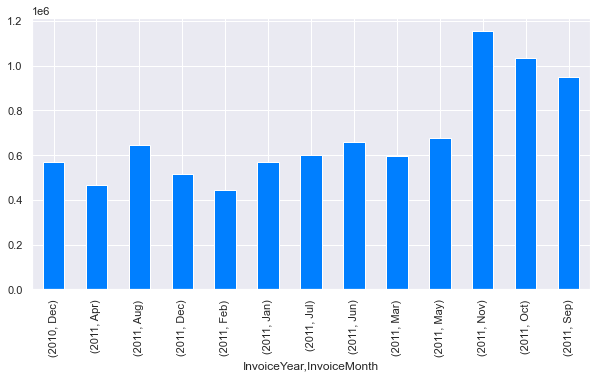

In [ ]:
total_revenue_per_month.plot(kind='bar', figsize=(10,5))